# Работа с формами

__Формы__ в Django - это инструмент, позволяющий обрабатывать и валидировать данные, вводимые пользователем через веб-интерфейс. Они являются ключевой частью большинства веб-приложений для создания интерактивных элементов, таких как пользовательские запросы, регистрационные формы и настройки.

## HTML-формы

   __Форма__ в HTML - это набор элементов внутри __\<form>...\</form>__, которые позволяют пользователю манипулировать объектами и отправлять информацию на сервер.<br></br>

### Основная Структура HTML-Формы

####  Тег __\<form>__
   * __Определение__: Тег __\<form>__ создает контейнер для различных элементов управления формы, таких как текстовые поля, кнопки, переключатели и т.д.
   * __Атрибуты__:
       * __action__: URL, на который будет отправлена форма.
       * __method__: Метод HTTP-запроса (чаще всего GET или POST).

####  __Элементы Управления__
   * __\<input>__: Один из самых универсальных элементов формы. Имеет различные типы (text, password, submit, checkbox, radio и т.д.).

In [ ]:
<input type="text" name="username">
<input type="password" name="password">

   * __\<textarea>__: Поле для многострочного текста.

In [ ]:
<textarea name="comment"></textarea>

   * __\<select>__ и __\<option>__: Раскрывающийся список выбора.

In [ ]:
<select name="coding_language">
  <option value="python">Python</option>
  <option value="cpp">C++</option>
</select>

   * __\<button>__: Кнопка, используется для отправки формы.

In [ ]:
<button type="submit">Отправить</button>

### Отправка Данных Формы

####  Методы HTTP

   * __GET__: Параметры формы добавляются к URL. Подходит для поисковых запросов и нечувствительных данных.
   * __POST__: Параметры отправляются в теле запроса. Используется для отправки чувствительных данных, таких как пароли.
Обработка Данных На Сервере

После отправки формы сервер обрабатывает полученные данные. В зависимости от технологии на сервере это может включать в себя валидацию, запись в базу данных или выполнение других действий.

### Валидация Форм

   * __Клиентская Валидация__

Используется HTML5 и JavaScript для проверки правильности введенных данных до их отправки на сервер.<br></br>
__Примеры: required, maxlength, pattern.__

In [ ]:
<input type="text" name="username" required>

   * __Серверная Валидация__

Осуществляется после отправки данных на сервер. Важна для безопасности, так как клиентская валидация может быть обойдена.

### Безопасность Форм

   * __Защита от CSRF (Cross-Site Request Forgery)__: Механизмы защиты, такие как токены CSRF, предотвращают подделку межсайтовых запросов. В формы токен можно дообавить с помощью шаблонного тега:

In [ ]:
{% csrf_token %}

Указанный тег вводит скрытое поле с автоматически сгенерированным токеном, например:

In [ ]:
<input type='hidden' name='csrfmiddlewaretoken' value='26JjKo2lcEtYkGoV9z4XmJIEHLXN5LDR' />

По умолчанию Django проверяет наличие токена CSRF во всех запросах методом POST. Тег __csrf_token__ следует вставлять во все формы, передаваемые на обработку методом POST.

   * __Проверка Ввода__: Всегда проверяйте и очищайте данные формы на сервере для предотвращения SQL-инъекций и других атак.

## Создание формы в Django

В контексте веб-приложения «форма» может относиться к HTML __\<form>__ или к __Django Form__ который его создает, или к структурированным данным, возвращаемым при отправке, или к непрерывной рабочей коллекции этих частей.

### Класс Form (Формы, не связанные с моделями)

__Form__ в Django используется для создания форм, которые не связаны напрямую с моделью данных. Эти формы подходят для сценариев, когда необходимо собрать информацию, не сохраняемую в моделях приложения.

Создадим в приложении __tasks__ файл __forms.py__, в нем буду храниться все формы. И добавим в него следующий код:

In [ ]:
from django import forms

class FeedbackForm(forms.Form):
    name = forms.CharField(label='Ваше имя', max_length=100)
    email = forms.EmailField(label='Электронная почта')
    message = forms.CharField(widget=forms.Textarea, label='Сообщение')

   * __FeedbackForm__ — это пользовательская форма для сбора отзывов.
   * __forms.CharField__ и __forms.EmailField__ — поля формы. CharField используется для текстовых данных, а EmailField — для валидации электронной почты.
   * Аргумент __widget=forms.Textarea__ — указывает, что поле message должно быть многострочным текстовым полем.

В __views.py__ создайте функции для обработки форм:

In [ ]:
from .forms import FeedbackForm
from django.shortcuts import render, redirect

def feedback_view(request):
    if request.method == 'POST':
        form = FeedbackForm(request.POST)
        if form.is_valid():
            # Обработка данных формы
            return redirect('/tasks')
    else:
        form = FeedbackForm()
    return render(request, 'tasks/feedback.html', {'form': form})

   * Функция __feedback_view__ обрабатывает запросы на URL, связанный с формой обратной связи.
   * __if request.method == 'POST'__: Проверяет, отправлены ли данные формы методом POST.
   * __form.is_valid()__: Валидирует данные формы.
   * __redirect('/tasks')__: Перенаправляет пользователя на другую страницу после успешной обработки формы.
   * __render(request, 'tasks/feedback.html', {'form': form})__: Отображает шаблон __feedback.html__, передавая ему экземпляр формы.

Создадим шаблон __tasks/feedback.html__ для отображения формы __FeedbackForm__:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Отправить</button>
    </form>
{% endblock %}

   * __{% csrf_token %}__: Добавляет токен CSRF для предотвращения межсайтовой подделки запросов.
   * __{{ form.as_p }}__: Отображает поля формы, обернутые в параграфы (\<p>).

Создадим маршрут для отображения формы в __urls.py__:

In [ ]:
urlpatterns = [
    # ... другие URL-маршруты ...
    path('feedback/', views.feedback_view, name='feedback'),
]

Запустим тестовый сервер и перейдем на http://127.0.0.1:8000/tasks/feedback/:

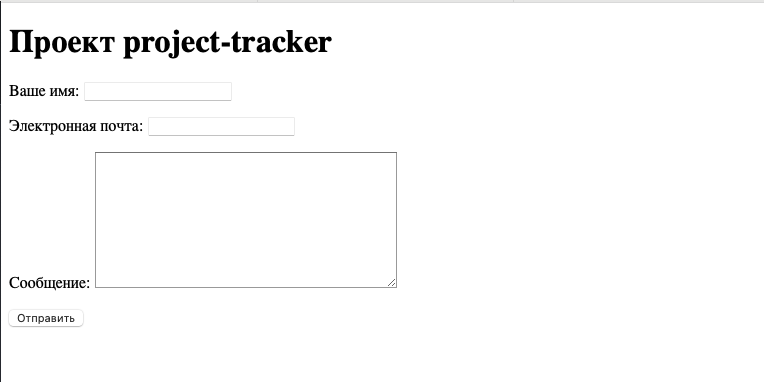

На странице отображается форма с полями, которые мы определили в __FeedbackForm__. Если попробовать ввести в поле "Электронная почта" любой текст, отличный от почты, то Django валидирует данные:

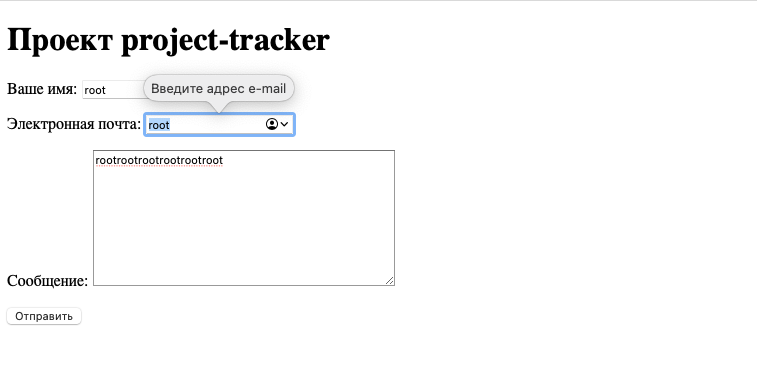

Если ввести валидные данные, Django отправит их на сервер и нас перенаправит на страницу, прописанную в __redirect()__.

### Обработка данных формы

   Какие бы данные ни были отправлены с формой, после того, как они были успешно проверены вызовом __is_valid()__ (и __is_valid()__ вернул __True__), проверенные данные формы будут в __form.cleaned_data__ словаре. Эти данные будут преобразованы в типы Python.

Вот как данные формы могут быть обработаны в представлении, которое обрабатывает эту форму:

In [ ]:
from .forms import FeedbackForm
from django.shortcuts import render, redirect

from django.core.mail import send_mail

def feedback_view(request):
    if request.method == 'POST':
        form = FeedbackForm(request.POST)
        if form.is_valid():
            name = form.cleaned_data['name']
            email = form.cleaned_data['email']
            message = form.cleaned_data['message']
            
            recipients = ['info@example.com']
            recipients.append(email)
            
            send_mail(subject, message, email, recipients)
            
            return redirect('/tasks')
    else:
        form = FeedbackForm()
    return render(request, 'tasks/feedback.html', {'form': form})

Некоторые типы полей требуют дополнительной обработки. Например, файлы, которые загружаются с помощью формы, должны обрабатываться по-другому (их можно получить из __request.FILES__, а не из __request.POST__).

### ModelForm (Формы, связанные с моделями)

__ModelForm__ используется для создания форм, которые связаны с моделями Django. Это удобно, когда форма предназначена для создания или изменения экземпляра модели.

Создадим класс формы в файле __forms.py__ приложения tasks:

In [ ]:
from django.forms import ModelForm
from .models import Project

class ProjectForm(ModelForm):
    class Meta:
        model = Project
        fields = ['name', 'description']

   * __ProjectForm__ наследуется от __ModelForm__.
   * __В классе __Meta__, мы указываем, что эта форма предназначена для модели __Project__.
   * __fields__ указывает на то, какие поля модели должны быть включены в форму. Здесь это __name__ и __description__.

В __views.py__ добавим представление для обработки создания нового проекта.

In [ ]:
from django.shortcuts import render, redirect
from .forms import ProjectForm

def create_project(request):
    if request.method == 'POST':
        form = ProjectForm(request.POST)
        if form.is_valid():
            form.save()
            return redirect('tasks:projects_list')
    else:
        form = ProjectForm()
    return render(request, 'tasks/project_create.html', {'form': form})

   * Мы создаем экземпляр __ProjectForm__ при получении запроса __POST__. Данные формы проверяются на валидность, и при успешной валидации новый проект сохраняется.
   * Если запрос не __POST__ (например, при первом открытии страницы), отображается пустая форма.
   * В случае успешного создания проекта пользователь перенаправляется на страницу со списком проектов.

Создайте HTML-шаблон __project_create.html__ для отображения формы:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
<h2>Создать новый проект</h2>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Сохранить</button>
    </form>
{% endblock %}

Добавим в шаблон __projects_list.html__ ссылку на создание нового проекта: 

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <h1>Список проектов</h1>
    
        <!-- Ссылка на создание нового проекта -->
    <p><a href="{% url 'tasks:create_project' %}">Создать новый проект</a></p>
    
    
    <ul>
        {% for project in project_list %}
            <li><a href="{% url 'tasks:project_detail' project.id %}">{{ project.name }}</a></li>
        {% endfor %}
    </ul>
{% endblock %}

Добавьте маршрут в __urls.py__ для представления __create_project()__:

In [ ]:
urlpatterns = [
    # ... другие URL-маршруты ...
    path('project/new/', views.create_project, name='create_project'),
]

Запустим тестовый сервер и перейдем на http://127.0.0.1:8000/tasks/projects/:

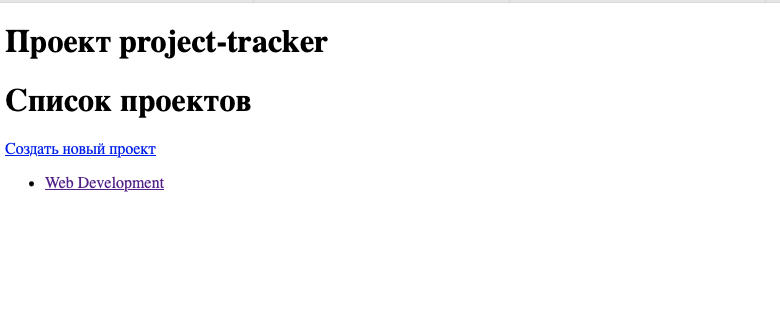

Появилась гиперссылка на создание нового проекта. Перейдем по ней:

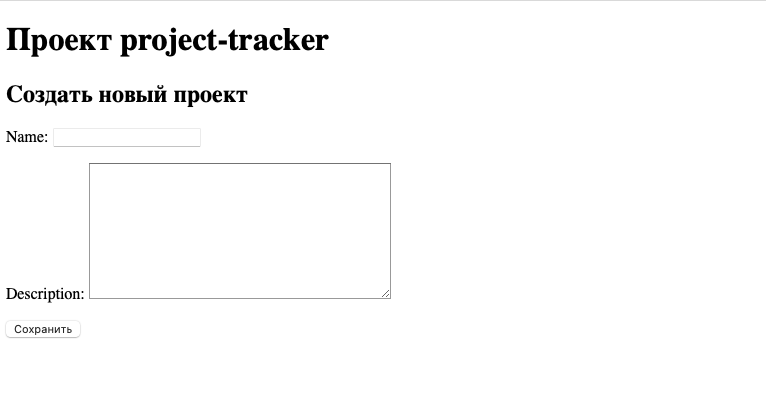

Введем валидные данные и нас перенаправит на страницу со списком проектов, где добавился новый проект:

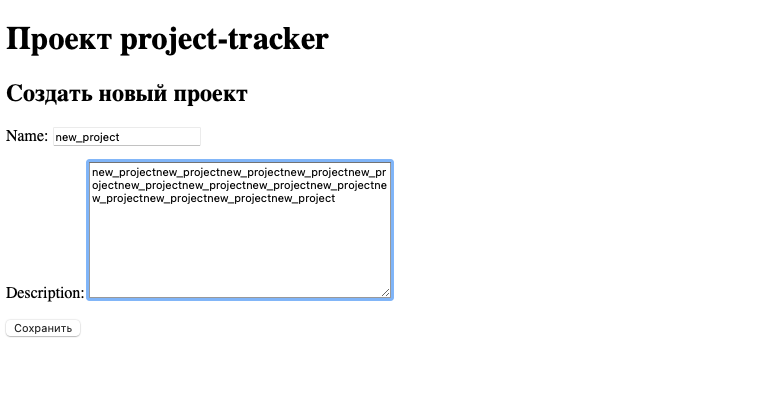

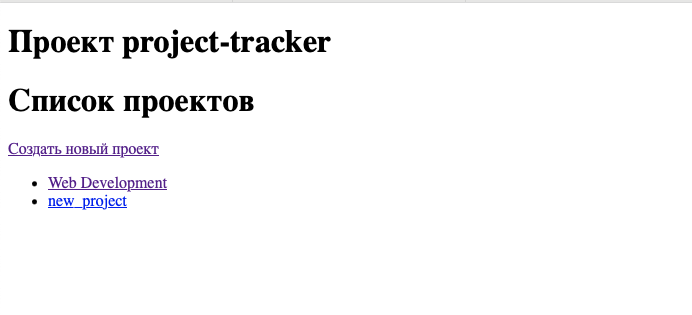

Аналогично создадим форму для добавления задач в проекты:

Создадим класс формы в файле forms.py приложения tasks:

In [ ]:
from .models import Task

class TaskForm(forms.ModelForm):
    class Meta:
        model = Task
        fields = ['name', 'description', 'status', 'assignee']

В views.py добавим представление

In [ ]:
from .forms import TaskForm

def add_task_to_project(request, project_id):
    project = get_object_or_404(Project, pk=project_id)
    if request.method == 'POST':
        form = TaskForm(request.POST)
        if form.is_valid():
            task = form.save(commit=False)
            task.project = project
            task.save()
            return redirect('tasks:project_detail', project_id=project.id)
    else:
        form = TaskForm()
    return render(request, 'tasks/add_task.html', {'form': form, 'project': project})

В этом представлении:

   * Получаем __project__ по __project_id__.
   * Создаем экземпляр __TaskForm__ при получении запроса __POST__.
   * При валидной форме задача связывается с проектом и сохраняется.
   * Пользователь перенаправляется на страницу детального просмотра проекта после добавления задачи.

Добавим маршрут в __urls.py__:

In [ ]:
urlpatterns = [
    # ... другие URL-маршруты ...
    path('project/<int:project_id>/add_task/', views.add_task_to_project, name='add_task_to_project'),
]

Создайте шаблон __add_task.html__ для отображения формы создания задачи:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <h2>Добавить задачу в проект {{ project.name }}</h2>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Создать задачу</button>
    </form>
{% endblock %}

И добавим ссылку на создание задачи на шаблон подробного описания проекта __project_detail.html__:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <h1>{{ project.name }}</h1>
    <p>{{ project.description }}</p>

    <!-- Ссылка для добавления новой задачи -->
    <p><a href="{% url 'tasks:add_task_to_project' project.id %}">Добавить новую задачу</a></p>

    <h2>Задачи в проекте</h2>
    <ul>
        {% for task in project.tasks.all %}
            <li><a href="{% url 'tasks:task_detail' project.id task.id %}">{{ task.name }}</a> - {{ task.status }}</li>
        {% empty %}
            <li>В этом проекте пока нет задач.</li>
        {% endfor %}
    </ul>
{% endblock %}

Запустим тестовый сервер и перейдем в созданный нами проект:

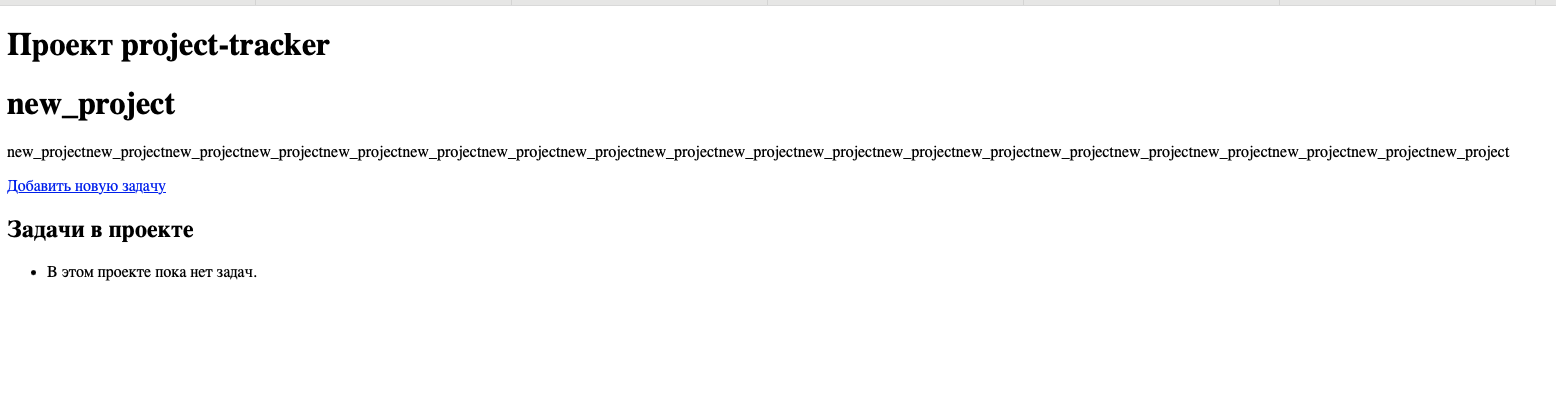

Появилась ссылка на создание новой задачи, перейдя по ней попадаем на страницу с формой:

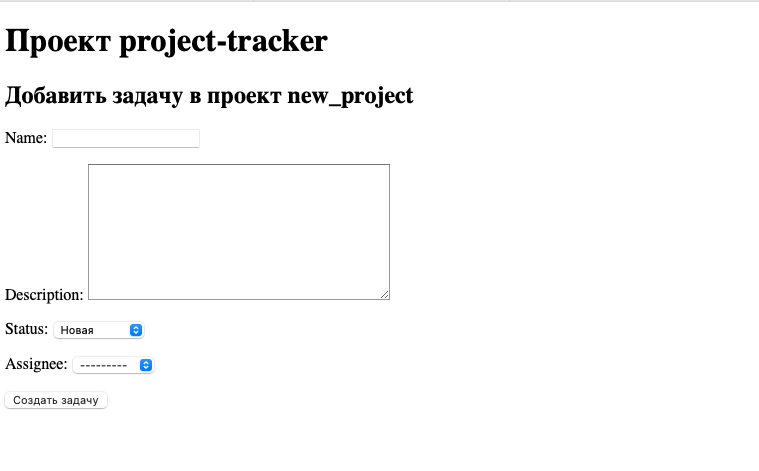

Вводим данные и затем нас возвращает обратно на страницу проекта со списком задач:

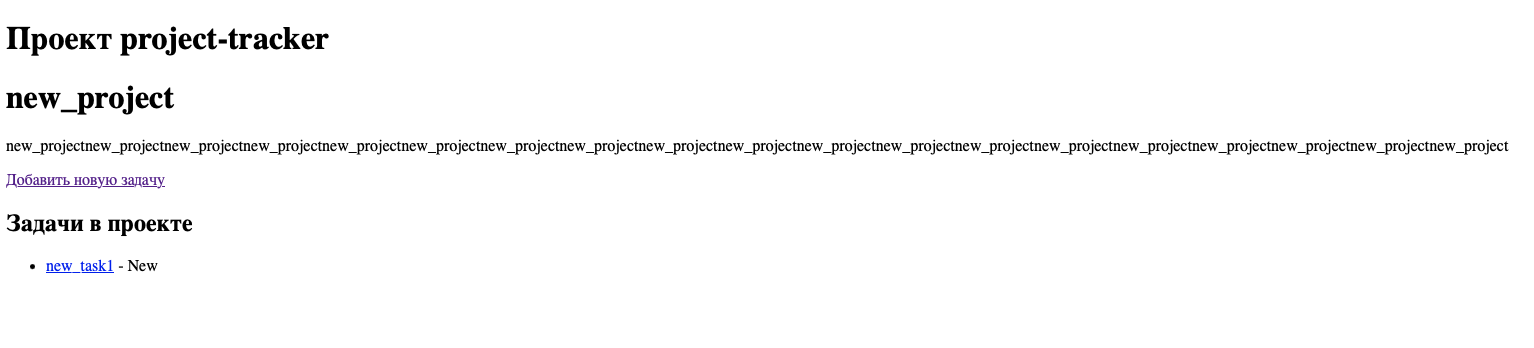

# Домашнее задание

1. __Создание формы отчета об ошибках (BugReportForm):__

    * Создание __ModelForm__ для __BugReport__:<br></br>
В файле __forms.py__ вашего приложения создайте класс __BugReportForm__, использующий __ModelForm__.
Форма должна включать поля __title, description, status, priority__. Убедитесь, что __project__ и __task__ могут быть выбраны пользователем.<br></br>
    * Создание представления для добавления отчета об ошибке:<br></br>
В __views.py__ создайте представление, которое обрабатывает создание новых отчетов об ошибках. Представление должно рендерить __bug_report_form.html__.
Убедитесь, что форма корректно обрабатывает входные данные и сохраняет новый отчет об ошибке.<br></br>
    * Создание шаблона для формы отчета об ошибках:<br></br>
Создайте шаблон __bug_report_form.html__, который отображает форму.
Форма должна содержать __CSRF-токен__ и корректно отображать все поля формы, включая сообщения об ошибках валидации.

2. __Создание ModelForm для FeatureRequest (FeatureRequestForm)__:
    * Подобно __BugReportForm__, создайте класс __FeatureRequestForm__ в __forms.py__.<br></br>
Включите поля __title, description, status, priority__.<br></br>
    * Создание представления для добавления запроса на улучшение:<br></br>
В __views.py__ добавьте представление для обработки создания новых запросов на улучшение.
Представление должно рендерить __feature_request_form.html__.<br></br>
    * Создание шаблона для формы запроса на улучшение:<br></br>
Создайте шаблон __feature_request_form.html__.
Убедитесь, что форма корректно отображается и включает необходимые поля для ввода данных.

3. __Добавление навигационных ссылок:__
    * Добавьте в шаблоны вашего приложения ссылки для перехода к формам создания отчетов об ошибках и запросов на улучшение.

Ссылка на документацию Django: https://docs.djangoproject.com/en/5.0/